<a href="https://colab.research.google.com/github/rladbstj56/2024PythonDataAnalysis/blob/main/%EC%8B%A4%EC%8A%B5(%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
score = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/grade.csv')

score.head()

,id,mid_test,final_test,hw1,hw2,grade
0,30,81,100,97,94,95
1,37,99,95,100,100,95
2,51,97,88,100,100,95
3,54,80,92,100,100,95
4,3,70,82,97,100,90


In [2]:
score['test'] = score['mid_test']*0.4 + score['final_test']*0.6
score['hw'] = score['hw1']*0.5 + score['hw2']*0.5

print(score.head())

   id  mid_test  final_test  hw1  hw2  grade  test     hw
0  30        81         100   97   94     95  92.4   95.5
1  37        99          95  100  100     95  96.6  100.0
2  51        97          88  100  100     95  91.6  100.0
3  54        80          92  100  100     95  87.2  100.0
4   3        70          82   97  100     90  77.2   98.5


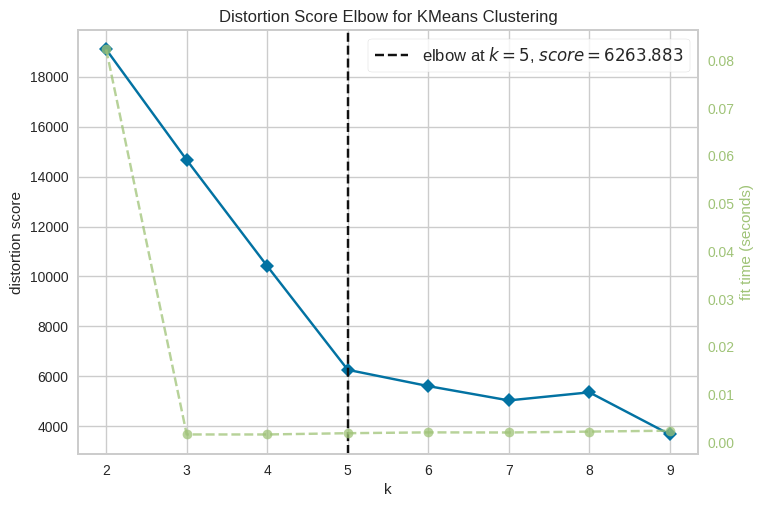

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = score[['test','hw']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model, k=(2,10))
vis.fit(data)
vis.show() # k = 6

In [4]:
model = KMeans(n_clusters = 6)
model.fit(data)
label = model.labels_
score['label'] = label
score.head()
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          57 non-null     int64  
 1   mid_test    57 non-null     int64  
 2   final_test  57 non-null     int64  
 3   hw1         57 non-null     int64  
 4   hw2         57 non-null     int64  
 5   grade       57 non-null     int64  
 6   test        57 non-null     float64
 7   hw          57 non-null     float64
 8   label       57 non-null     int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 3.9 KB


In [5]:
print('cluster',model.labels_)

cluster [2 2 2 2 2 2 2 2 2 2 2 0 4 0 4 4 4 4 0 4 4 0 4 4 4 4 4 4 4 4 4 4 0 1 3 3 3
 1 3 3 1 3 1 1 1 1 3 3 3 3 5 1 3 3 1 5 5]


centroid [[72.16       64.3       ]
 [47.57777778 39.22222222]
 [85.27272727 98.22727273]
 [39.1        64.625     ]
 [61.62352941 93.11764706]
 [36.06666667 17.5       ]]
inertia 4904.07120825906
score -4904.07120825906


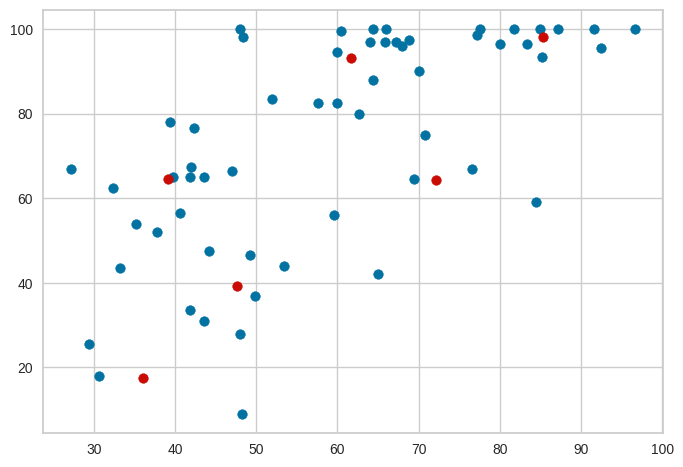

In [6]:
print('centroid',model.cluster_centers_)
print('inertia',model.inertia_)
print('score',model.score(data))
center = model.cluster_centers_
cx = center[:,0]
cy = center[:,1]
x = score[['test']]
y = score[['hw']]
plt.scatter(x,y)
plt.scatter(cx,cy,c='r')
plt.show()

In [7]:
# 조건 2
import numpy as np
score['test'] = score['mid_test']*0.3+score['final_test']*0.4+score['hw1']*0.15+score['hw2']*0.15
present = np.random.randint(101,size=(57,1))
print(present)

[[ 54]
 [ 21]
 [ 71]
 [ 16]
 [ 91]
 [ 40]
 [ 16]
 [ 23]
 [  6]
 [ 14]
 [ 88]
 [ 70]
 [ 44]
 [ 59]
 [ 48]
 [ 70]
 [ 31]
 [ 60]
 [ 89]
 [ 62]
 [ 93]
 [ 33]
 [ 26]
 [ 99]
 [100]
 [ 91]
 [ 35]
 [ 58]
 [ 72]
 [ 52]
 [ 14]
 [ 43]
 [ 41]
 [ 42]
 [ 79]
 [ 72]
 [ 18]
 [ 91]
 [ 53]
 [ 35]
 [ 91]
 [ 51]
 [ 97]
 [ 10]
 [  6]
 [ 57]
 [ 47]
 [ 78]
 [ 97]
 [ 90]
 [  2]
 [ 89]
 [ 59]
 [ 53]
 [ 55]
 [ 71]
 [ 52]]


In [8]:
score['present'] = present
score.head(57)

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present
0,30,81,100,97,94,95,92.95,95.5,2,54
1,37,99,95,100,100,95,97.70,100.0,2,21
2,51,97,88,100,100,95,94.30,100.0,2,71
3,54,80,92,100,100,95,90.80,100.0,2,16
4,3,70,82,97,100,90,83.35,98.5,2,91
5,4,87,81,100,93,90,87.45,96.5,2,40
6,7,89,74,93,100,90,85.25,96.5,2,16
7,8,86,72,100,100,90,84.60,100.0,2,23
8,12,89,77,100,100,90,87.50,100.0,2,6
9,45,79,89,100,100,90,89.30,100.0,2,14


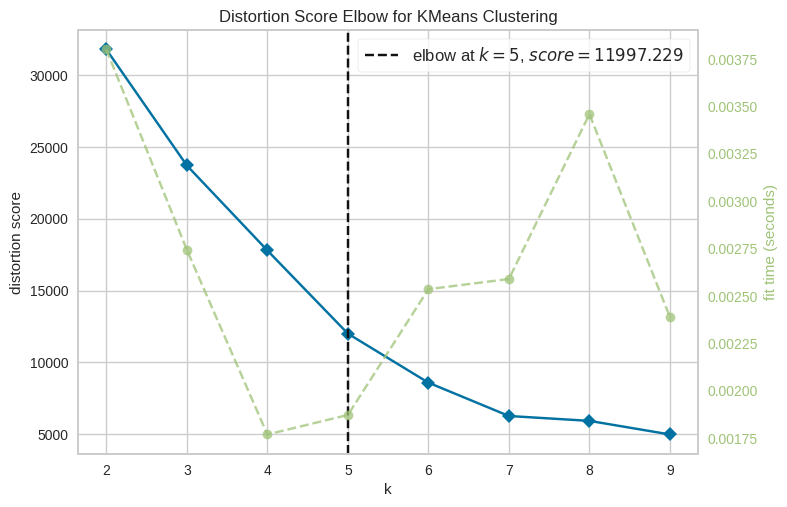

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
data = score[['test','present']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model, k=(2,10))
vis.fit(data)
vis.show() # k = 4

In [10]:
model = KMeans(n_clusters = 4)
model.fit(data)
label2 = model.labels_
score['label2'] = label2
score.head(10)

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present,label2
0,30,81,100,97,94,95,92.95,95.5,2,54,3
1,37,99,95,100,100,95,97.70,100.0,2,21,1
2,51,97,88,100,100,95,94.30,100.0,2,71,3
3,54,80,92,100,100,95,90.80,100.0,2,16,1
4,3,70,82,97,100,90,83.35,98.5,2,91,3
5,4,87,81,100,93,90,87.45,96.5,2,40,1
6,7,89,74,93,100,90,85.25,96.5,2,16,1
7,8,86,72,100,100,90,84.60,100.0,2,23,1
8,12,89,77,100,100,90,87.50,100.0,2,6,1
9,45,79,89,100,100,90,89.30,100.0,2,14,1


centroid [[46.67272727 86.        ]
 [72.12894737 23.47368421]
 [47.225      49.75      ]
 [77.23       75.73333333]]
inertia 17349.89007256779
score -17349.890072567785


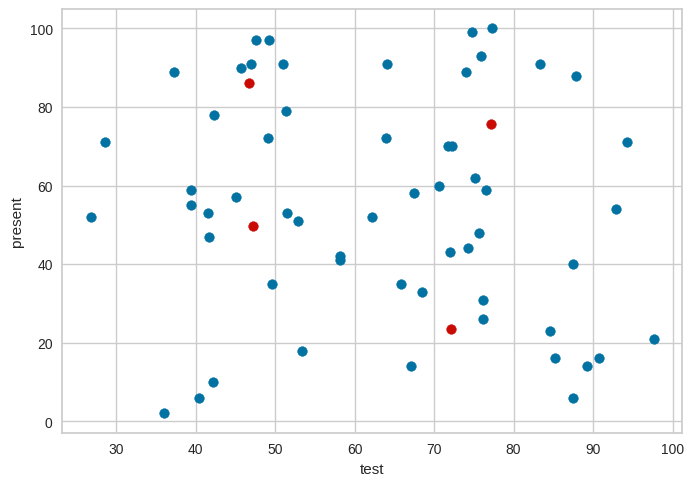

In [11]:
x = score[['test']]
y = score[['present']]
plt.scatter(x,y)
plt.xlabel('test')
plt.ylabel('present')
print('centroid',model.cluster_centers_)
print('inertia',model.inertia_)
print('score',model.score(data))
center = model.cluster_centers_
cx = center[:,0]
cy = center[:,1]
plt.scatter(cx,cy,c='r')
plt.show()

In [12]:
# 조건3
score['total'] = score['mid_test']*0.3 + score['final_test']*0.4 + score['hw1']*0.15 + score['hw2']*0.15
score['0'] = 0
score.head()

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present,label2,total,0
0,30,81,100,97,94,95,92.95,95.5,2,54,3,92.95,0
1,37,99,95,100,100,95,97.70,100.0,2,21,1,97.70,0
2,51,97,88,100,100,95,94.30,100.0,2,71,3,94.30,0
3,54,80,92,100,100,95,90.80,100.0,2,16,1,90.80,0
4,3,70,82,97,100,90,83.35,98.5,2,91,3,83.35,0


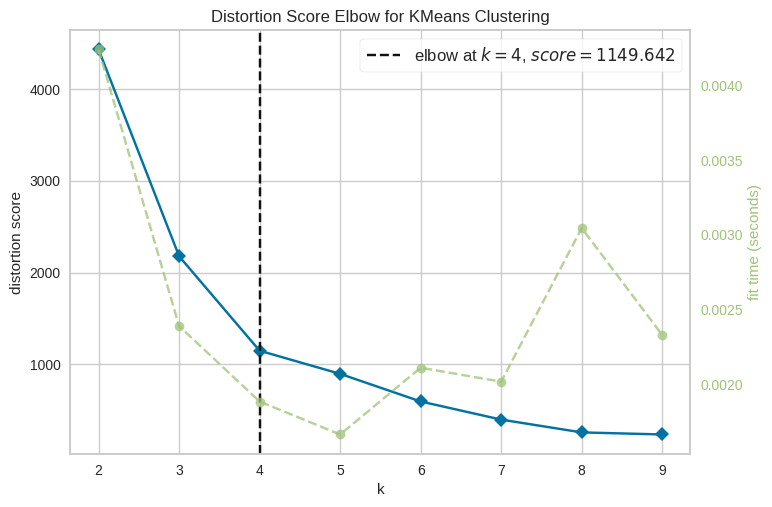

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
data = score[['total','0']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model,k=(2,10))
vis.fit(data)
vis.show() # k = 4

In [14]:
model = KMeans(n_clusters = 4)
model.fit(data)
label3 = model.labels_
score['label3'] = label3
score.head(10)

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present,label2,total,0,label3
0,30,81,100,97,94,95,92.95,95.5,2,54,3,92.95,0,2
1,37,99,95,100,100,95,97.70,100.0,2,21,1,97.70,0,2
2,51,97,88,100,100,95,94.30,100.0,2,71,3,94.30,0,2
3,54,80,92,100,100,95,90.80,100.0,2,16,1,90.80,0,2
4,3,70,82,97,100,90,83.35,98.5,2,91,3,83.35,0,2
5,4,87,81,100,93,90,87.45,96.5,2,40,1,87.45,0,2
6,7,89,74,93,100,90,85.25,96.5,2,16,1,85.25,0,2
7,8,86,72,100,100,90,84.60,100.0,2,23,1,84.60,0,2
8,12,89,77,100,100,90,87.50,100.0,2,6,1,87.50,0,2
9,45,79,89,100,100,90,89.30,100.0,2,14,1,89.30,0,2


In [15]:
print('cluster',model.labels_)

cluster [2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 3 0 0 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


centroid [[61.355       0.        ]
 [43.0047619   0.        ]
 [89.18636364  0.        ]
 [74.08666667  0.        ]]
inertia 1505.6095616883115
score -1505.6095616883115


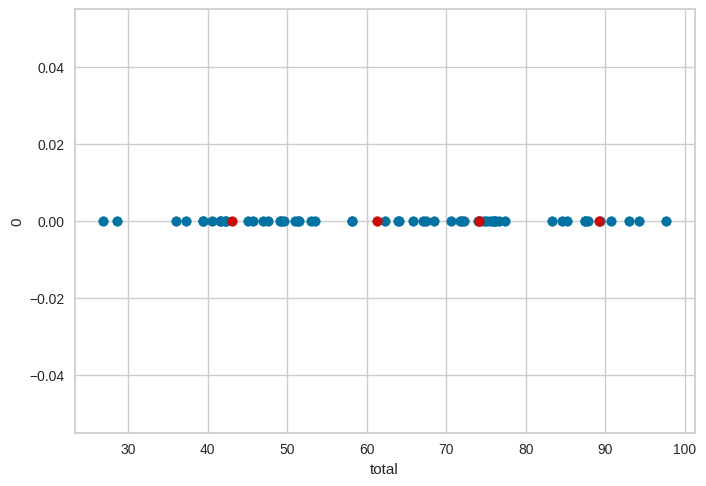

In [16]:
x = score[['total']]
y = score[['0']]
plt.scatter(x,y)
plt.xlabel('total')
plt.ylabel('0')
print('centroid',model.cluster_centers_)
print('inertia',model.inertia_)
print('score',model.score(data))
center = model.cluster_centers_
cx = center[:,0]
cy = center[:,1]
plt.scatter(cx,cy,c='r')
plt.show()